The data that I will be using is US presidential election data from 1976 - 2020. The source of the data is MIT's Election Data Science Lab, hosted by Harvard Dataverse. This data was given to me by Dr. Silva.
Link: https://dataverse.harvard.edu/file.xhtml?fileId=4299753&version=6.0
This data includes the following: election year, state, office, candidate, party, candidate votes, total votes, etc.

In [218]:
import pandas as pd
with open(r'C:\Users\Dave\Dropbox\College\Data in Emerging Media and Technologies\1976-2020-president.csv') as d:
    df = pd.read_csv(r"C:\Users\Dave\Dropbox\College\Data in Emerging Media and Technologies\1976-2020-president.csv")
print(df)

      year    state state_po  state_fips  state_cen  state_ic        office  \
0     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
...    ...      ...      ...         ...        ...       ...           ...   
4282  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4283  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4284  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4285  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4286  2020  WYOMING       WY          56         83        68  US PRESIDENT   

                    candidate              party_de

This analysis will involve preforming a historical analysis on the data in question to determine if there is a pattern between party wins.

In [219]:
df.keys()

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'party_simplified'],
      dtype='object')

We will exclude third party party candidates, as they does not pertain to core question. We shall consider percentage total votes for each party in each race from 1976 through 2020 using 8 year blocks, every two election cycles. We shall determine the controlling party via candidate vote totals nationally, excluding Bush v. Gore and Clinton v. Trump. In these cases, the controlling party of those elections shall be considered Republican.

In [220]:
candidates = df[(df['party_simplified'] == "DEMOCRAT") | (df['party_simplified'] == "REPUBLICAN") ]

In [221]:
candidates

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN
4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT
4268,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1610184,3298041,20210113,NaN,REPUBLICAN
4280,2020,WYOMING,WY,56,83,68,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,73491,278503,20210113,NaN,DEMOCRAT


In [222]:
candidates['state_vote_split'] = df['candidatevotes'] / df['totalvotes'] * 100

<ipython-input-222-a4ae0a52de8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['state_vote_split'] = df['candidatevotes'] / df['totalvotes'] * 100


In [223]:
df['candidatevotes'][0]

659170

In [224]:
candidates['state_vote_split']

0       55.727269
1       42.614871
7       57.904575
8       35.653131
11      56.366136
          ...    
4264    68.631552
4267    49.449537
4268    48.822437
4280    26.387867
4281    69.499790
Name: state_vote_split, Length: 1228, dtype: float64

In [225]:
candidates

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,state_vote_split
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,55.727269
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,42.614871
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,57.904575
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,35.653131
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,56.366136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN,68.631552
4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT,49.449537
4268,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1610184,3298041,20210113,NaN,REPUBLICAN,48.822437
4280,2020,WYOMING,WY,56,83,68,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,73491,278503,20210113,NaN,DEMOCRAT,26.387867


In [226]:
candidates.head(10)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,state_vote_split
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,55.727269
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,42.614871
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,57.904575
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,35.653131
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,56.366136
12,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,295602,742719,20210113,NaN,DEMOCRAT,39.799978
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,64.961728
20,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,267903,767535,20210113,NaN,REPUBLICAN,34.904337
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,49.748314
24,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,3742284,7803770,20210113,NaN,DEMOCRAT,47.954822


Here we will start calculating vote percentages by party, by state.

In [227]:
candidates_1976 = candidates[(candidates['year'] == 1976)]

In [228]:
candidates_1976[candidates_1976['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

48.32772179480301

In [229]:
candidates_1976[candidates_1976['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

49.4977841376252

In [230]:
candidates_1980 = candidates[(candidates['year'] == 1980)]

In [231]:
candidates_1980[candidates_1980['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

51.30810965849188

In [232]:
candidates_1980[candidates_1980['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

39.911074852242294

In [233]:
candidates_1988 = candidates[(candidates['year'] == 1988)]

In [234]:
candidates_1988[candidates_1988['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

53.66259744484452

In [235]:
candidates_1988[candidates_1988['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

45.10860947254205

In [236]:
candidates_1992 = candidates[(candidates['year'] == 1992)]

In [237]:
candidates_1992[candidates_1992['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

37.5547740713412

In [238]:
candidates_1992[candidates_1992['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

42.01496582018675

In [239]:
candidates_1996 = candidates[(candidates['year'] == 1996)]

In [240]:
candidates_1996[candidates_1996['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

41.27883746450583

In [241]:
candidates_1996[candidates_1996['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

47.90900173039689

In [242]:
candidates_2000 = candidates[(candidates['year'] == 2000)]

In [243]:
candidates_2000[candidates_2000['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

49.57504020287853

In [244]:
candidates_2000[candidates_2000['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

45.91855975777038

In [245]:
candidates_2004 = candidates[(candidates['year'] == 2004)]

In [246]:
candidates_2004[candidates_2004['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

52.21999800417345

In [247]:
candidates_2004[candidates_2004['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

45.585911503285246

In [248]:
candidates_2008 = candidates[(candidates['year'] == 2008)]

In [249]:
candidates_2008[candidates_2008['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

46.9465832557911

In [250]:
candidates_2008[candidates_2008['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

51.26538701378982

In [251]:
candidates_2012 = candidates[(candidates['year'] == 2012)]

In [252]:
candidates_2012[candidates_2012['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

48.89869938088381

In [253]:
candidates_2012[candidates_2012['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

48.94112593557484

In [254]:
candidates_2016 = candidates[(candidates['year'] == 2016)]

In [255]:
candidates_2016[candidates_2016['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

47.31524756385825

In [256]:
candidates_2016[candidates_2016['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

42.886479057581965

In [257]:
candidates_2020 = candidates[(candidates['year'] == 2020)]

In [258]:
candidates_2020[candidates_2020['party_simplified'] == "REPUBLICAN"].mean(axis = 0).state_vote_split

49.15727985871647

In [259]:
candidates_2020[candidates_2020['party_simplified'] == "DEMOCRAT"].mean(axis = 0).state_vote_split

48.56579655719238

We will take those percentages and put them in their own data frame.

In [260]:
cycle = pd.DataFrame({'cycle' : ['1976-1980', '1980-1984', '1984-1988', '1988-1992', '1992-1996', '1996-2000', '2000-2004', '2004-2008', '2008-2012', '2012-2016', '2016-2020'], 'dem' : [49.49, 39.91, 45.10, 42.01, 47.90, 45.91, 45.58, 51.26, 48.94, 42.88, 48.56], 'rep' : [48.32, 51.30, 53.66, 37.55, 41.27, 49.57, 52.21, 46.94, 48.89, 47.31, 49.15]})

In [261]:
cycle

,cycle,dem,rep
0,1976-1980,49.49,48.32
1,1980-1984,39.91,51.30
2,1984-1988,45.10,53.66
3,1988-1992,42.01,37.55
4,1992-1996,47.90,41.27
5,1996-2000,45.91,49.57
6,2000-2004,45.58,52.21
7,2004-2008,51.26,46.94
8,2008-2012,48.94,48.89
9,2012-2016,42.88,47.31


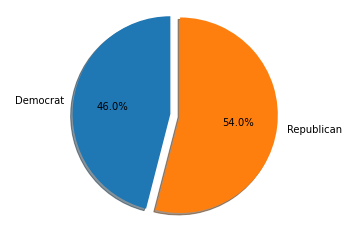

In [2]:
import matplotlib.pyplot as plt

labels = 'Democrat', 'Republican'
sizes = [46, 54]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

As we can see here, the democrats won 5 elections (46%) and the republicans won 6 elections (54%). George H.W. Bush being the anomaly of the data set, we can infer a pattern exists. (The 2000 and 2016 elections had republican winners because of the electoral college. These could be counted as democratic wins, but because the EC determines the presidency, we will consider them republican wins.)

Based on this data, we can infer that there is a pattern of back and forth between election cycles with some regularity, accounting for anomalies aside. There is some bias in the data to address. When favoring state population vote totals individually, different results are obtained from when the average of the national vote is calculated. 